# 2.4 Activity

For our **Unit 2** activities, we will continue working with snowpack, precipitation, and temperature measurements at the Central Sierra Snow Laboratory in Sierra Nevada, California.

By the end of this activity, you will:

1. Join multiple files using Pandas.
2. Explore additional datetime components.
3. Use groups to aggregate data.
4. Plot grouped data using Pandas.

**Acknowledgements**

Osterhuber, Randall; Schwartz, Andrew (2021), Snowpack, precipitation, and temperature measurements at the Central Sierra Snow Laboratory for water years 1971 to 2019, Dryad, Dataset, https://doi.org/10.6078/D1941T

## Part 1: Workspace Setup

**Tasks**

- Run the cell below to download both data files.
- Import Pandas to perform data wrangling.
- Read in the first data file to a variable called `precip_2010_2014`. 
- Read the second data file to a variable called `precip_2015_2019`.
- Return the first few rows of each DataFrame to ensure they have loaded correctly. 

**Note:** Seasons in these datasets start in October of the year prior. So, the 2010 season will begin in 2009.

In [1]:
# Download data (precip_2010-2014.csv)
!gdown 1LgXydoOfZ4lla50gQaDXgNSrVBaM2Mfn

# Download data (precip_2015-2019.csv)
!gdown 16mnuWpq-LFhZ8K4YVW9hKF5o5QMMI4dl

Downloading...
From: https://drive.google.com/uc?id=1LgXydoOfZ4lla50gQaDXgNSrVBaM2Mfn
To: /content/precip_2010-2014.csv
100% 75.1k/75.1k [00:00<00:00, 41.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=16mnuWpq-LFhZ8K4YVW9hKF5o5QMMI4dl
To: /content/precip_2015-2019.csv
100% 75.5k/75.5k [00:00<00:00, 45.2MB/s]


In [4]:
#mounting drive to get it started
from google.colab import drive
drive.mount('/content/drive')
#import Pandas
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#reading in first data file
precip_2010_2014 = pd.read_csv('/content/precip_2010-2014.csv')
#reading in second data file
precip_2015_2019 = pd.read_csv('/content/precip_2015-2019.csv')

In [8]:
#using .head() to verify both files have been loaded correctly
precip_2010_2014.head() #looks good

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Remarks
0,10/1/09,18,1,0,0,NaN,NaN,0,0.0,0,0,NaN
1,10/2/09,16,2,0,0,NaN,NaN,0,0.0,0,0,NaN
2,10/3/09,11,0,T,0,100.0,NaN,0,0.0,0,0,NaN
3,10/4/09,4,-3,9,9,100.0,NaN,0.5,0.5,0.5,--,NaN
4,10/5/09,6,-6,1,10,100.0,NaN,10,10.5,10,0.6,NaN


In [10]:
precip_2015_2019.head() #looks good

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Remarks
0,10/1/14,16,3,0,0,NaN,NaN,0,0.0,0,0,NaN
1,10/2/14,22,1,0,0,NaN,NaN,0,0.0,0,0,NaN
2,10/3/14,24,5,0,0,NaN,NaN,0,0.0,0,0,NaN
3,10/4/14,26,5,0,0,NaN,NaN,0,0.0,0,0,NaN
4,10/5/14,25,8,0,0,NaN,NaN,0,0.0,0,0,NaN


Print the `shape` of each DataFrame.

In [15]:
precip_2010_2014.shape #(1826, 12)

(1826, 12)

In [14]:
precip_2015_2019.shape #(1826, 12)

(1826, 12)

## Part 2: Merging Datasets

While these DataFrames can be useful on their own, it may be more helpful to have them combined for statistical analysis.

Combine the two DataFrames using `pd.concat()`.

[Reference](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [61]:
pd.concat([precip_2010_2014, precip_2015_2019]) #looking at the first 5 and last 5 observations, we can tell that this works! It just added the second df to the bottom of the first df

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Remarks
0,10/1/09,18,1,0,0,NaN,NaN,0,0.0,0,0,NaN
1,10/2/09,16,2,0,0,NaN,NaN,0,0.0,0,0,NaN
2,10/3/09,11,0,T,0,100.0,NaN,0,0.0,0,0,NaN
3,10/4/09,4,-3,9,9,100.0,NaN,0.5,0.5,0.5,--,NaN
4,10/5/09,6,-6,1,10,100.0,NaN,10,10.5,10,0.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1821,9/26/19,23,8,0,2188,NaN,NaN,0,1240.5,0,0,NaN
1822,9/27/19,18,7,0,2188,NaN,NaN,0,1240.5,0,0,NaN
1823,9/28/19,8,-3,9,2197,50.0,50.0,0,1240.5,0,0,NaN
1824,9/29/19,2,-3,4,2201,80.0,20.0,2.5,1243.0,2.5,--,NaN


Let's combine them again but this time using `pd.merge()` saving the result to a new variable called `precip_2010_2019`. ([Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html))

*Hint: Try using an outer join for the "how" parameter with `pd.merge(..., how="outer")`*

In [24]:
precip_2010_2019 = precip_2010_2014.merge(precip_2015_2019, how="outer")
#using describe() to double check
precip_2010_2019.describe()

,Air Temp Max (C),Air Temp Min (C),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,Season Total Snow (cm),Remarks
count,3652.000000,3652.000000,3652.000000,793.000000,564.000000,3652.000000,0.0
mean,13.261501,0.225082,1086.900876,85.046658,77.586879,616.606654,NaN
std,8.774375,6.379983,765.731767,29.612380,34.416959,485.770588,NaN
min,-9.000000,-21.000000,0.000000,1.000000,1.000000,0.000000,NaN
25%,6.000000,-4.000000,470.000000,90.000000,60.000000,179.500000,NaN
50%,13.000000,0.000000,1001.000000,100.000000,100.000000,539.500000,NaN
75%,21.000000,5.000000,1541.000000,100.000000,100.000000,954.000000,NaN
max,31.000000,87.000000,3064.000000,100.000000,100.000000,1633.000000,NaN


Print the `shape` of your newly created DataFrame.

In [25]:
precip_2010_2019.shape #this looks right, we have (3652, 12)

(3652, 12)

## Part 3: Working with dates

Convert the `Date` column to `datetime64` once again. Refer back to the previous activity if you need a refresher. 

[Reference](https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [27]:
#converting the Date data type to datetime64
precip_2010_2019['Date'] = pd.to_datetime(precip_2010_2019['Date'])

We now have access to `day`, `month`, `week`, and `year` components with `df['column'].dt.component`.

Add new `Year` and `Month` columns to the `precip_2010_2019` DataFrame using `precip_2010_2019['Date'].dt.year` and `.dt.month`.

In [43]:
precip_2010_2019['Year'] = precip_2010_2019['Date'].dt.year #adding Year column
precip_2010_2019['Month'] = precip_2010_2019['Date'].dt.month #adding Month column
#double checking
precip_2010_2019.head() #looks good

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Remarks,Year,Month,Week
0,2009-10-01,18,1,0,0,NaN,NaN,0,0.0,0,0,NaN,2009,10,40
1,2009-10-02,16,2,0,0,NaN,NaN,0,0.0,0,0,NaN,2009,10,40
2,2009-10-03,11,0,T,0,100.0,NaN,0,0.0,0,0,NaN,2009,10,40
3,2009-10-04,4,-3,9,9,100.0,NaN,0.5,0.5,0.5,--,NaN,2009,10,40
4,2009-10-05,6,-6,1,10,100.0,NaN,10,10.5,10,0.6,NaN,2009,10,41


Some components such week of the year need to be referenced using the `isocalendar()` function. Create a new `Week` column in the `precip_2010_2019` DataFrame using `precip_2010_2019['Date'].dt.isocalendar().week`.

[Reference](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html)

In [44]:
precip_2010_2019['Week'] = precip_2010_2019['Date'].dt.isocalendar().week

Call `precip_2010_2019[['Date','Year','Month','Week']].head()` to view your newly created columns.

In [45]:
precip_2010_2019[['Date','Year','Month','Week']].head() #all columns look correct

,Date,Year,Month,Week
0,2009-10-01,2009,10,40
1,2009-10-02,2009,10,40
2,2009-10-03,2009,10,40
3,2009-10-04,2009,10,40
4,2009-10-05,2009,10,41


## Part 4: Grouping Values

Since we don't have many values that would be useful to group on, we can use date components created earlier.

Use `precip_2010_2019.groupby(by=['Year','Month'])` to create groups for each year and month. Save this to a new variable called `precip_by_ym` and print the results. The output should be an `<object>`.

[Reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

In [55]:
#new variable
precip_by_ym = precip_2010_2019.groupby(by=['Year','Month'])
#print
print(precip_by_ym) #the output does show "object"

Print a `count` of each `Date` in the `precip_by_ym` group. Since we only have one observation per day, the resulting output should equal the number of days in the month.

In [52]:
#first, I'm printing .head() to conceptually understand the new variable
precip_by_ym.head() #data frame
#now printing counts
precip_by_ym['Date'].count()

Year  Month
2009  10       31
      11       30
      12       31
2010  1        31
      2        28
               ..
2019  5        31
      6        30
      7        31
      8        31
      9        30
Name: Date, Length: 120, dtype: int64

Display summary statistics for November 2010 using `.get_group()` and `.describe()`. 

*Hint: For groups with multiple index keys, you must supply a [tuple](https://www.geeksforgeeks.org/tuples-in-python/) for the group name parameter; simply wrap the key values in parenthesis. E.g. `.get_group(name=(key_1,key_2))`.*

[Reference](https://www.geeksforgeeks.org/pandas-groupby/)

In [59]:
precip_by_ym.get_group(name=(2010, 11)) #note, we do year, month because that's the way we grouped it originally

,Date,Air Temp Max (C),Air Temp Min (C),24-hour Total Precip (mm),Season Total Precip (mm),% of Precip as Snow,% of Precip as Rain,New Snow (cm),Season Total Snow (cm),Snowpack depth (cm),Snow Water Equivalent (cm),Remarks,Year,Month,Week
396,2010-11-01,18,-1,0,298,NaN,NaN,0,9.5,0,0,NaN,2010,11,44
397,2010-11-02,18,5,0,298,NaN,NaN,0,9.5,0,0,NaN,2010,11,44
398,2010-11-03,21,4,0,298,NaN,NaN,0,9.5,0,0,NaN,2010,11,44
399,2010-11-04,20,4,0,298,NaN,NaN,0,9.5,0,0,NaN,2010,11,44
400,2010-11-05,17,5,0,298,NaN,NaN,0,9.5,0,0,NaN,2010,11,44
401,2010-11-06,14,3,8,306,NaN,100.0,0,9.5,0,0,NaN,2010,11,44
402,2010-11-07,5,-2,44,350,50.0,50.0,4.5,14.0,T,--,NaN,2010,11,44
403,2010-11-08,4,-7,9,359,100.0,NaN,12,26.0,16.5,3.1,NaN,2010,11,45
404,2010-11-09,4,-8,7,366,100.0,NaN,T,26.0,15,--,NaN,2010,11,45
405,2010-11-10,2,-4,12,378,100.0,NaN,15.5,41.5,30,5,NaN,2010,11,45


Lastly, create a basic `plot` of the `mean` values in the `Season Total Precip (mm)` column of the `precip_by_ym` group.

*Hint: Use the built-in Pandas `.plot()` method after calling `.mean()` on the desired column. Don't worry about formatting the output; Seaborn can be used but is not necessary for this example.*

<AxesSubplot:xlabel='Year,Month'>

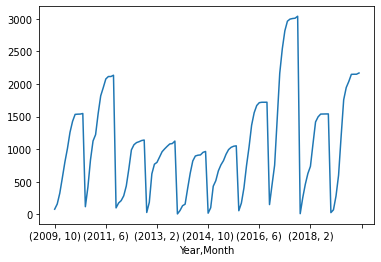

In [60]:
precip_by_ym['Season Total Precip (mm)'].mean().plot()

## Part 5: Thought Question

> *Comparing concat vs merge in Pandas, are there any downsides to choosing one method over the other? Use [Pandas: Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging) as a reference.*

It seems like there are benefits and downsides to both approaches based on the purpose of joining data frames. For example, one of the big differences between concatenate and merge is the place of attachment. The concat method attaches two data frames either along the rows or columns (based on the axis value) which is somewhat limiting if you wanted to make further modifications. Merge, on the other hand, allows you to choose a connecting point for the two data frames using a condition (with the "on" and "how" details) to preserve data types. However, with concat, we can also work with joining a data frame and a series (variable/ column) instead of two data frame sets. Both methods have a similar method of how to deal with indices when the two dataframes have different indices. Join for concat and how for merge both operate similarly, though how has more options (outer/ inner versus outer/ inner/ left/ right). I think if you are looking to be more specific with the way you want to attach two data frames, merge offers more specifications, but if you are simply looking to attach one data set to the bottom of the other, concat is perfectly adequate. I think it just comes down to how particular you need to be in order to determine which pandas method you would use to afix data frames.